In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import glob
from sklearn import linear_model

In [2]:
"""
# raw files
paths = ["DataForValidatingModels/Cocoa/", "DataForValidatingModels/Golden/", "DataForValidatingModels/Eugene/"]
files = sum([glob.glob(path + "*.csv") for path in paths], [])

#loop over them and create df for each csv
for file in files:
    with open(file, "r") as f:
        f.readline() # skip line
        f.readline() # skip line
        lines = f.readlines()

    with open("cleaned/" + file, "w") as f:
        header = lines[0].split(",")
        f.write(",".join(header) + "\n") # write header
        for line in lines[1:]:
            f.write(",".join(line.split(",")[:len(header)]) + "\n") # write only labeled columns
cleaned_files = ["cleaned/" + file for file in files]
"""

'\n# raw files\npaths = ["DataForValidatingModels/Cocoa/", "DataForValidatingModels/Golden/", "DataForValidatingModels/Eugene/"]\nfiles = sum([glob.glob(path + "*.csv") for path in paths], [])\n\n#loop over them and create df for each csv\nfor file in files:\n    with open(file, "r") as f:\n        f.readline() # skip line\n        f.readline() # skip line\n        lines = f.readlines()\n\n    with open("cleaned/" + file, "w") as f:\n        header = lines[0].split(",")\n        f.write(",".join(header) + "\n") # write header\n        for line in lines[1:]:\n            f.write(",".join(line.split(",")[:len(header)]) + "\n") # write only labeled columns\ncleaned_files = ["cleaned/" + file for file in files]\n'

In [3]:
"""
# create master csv
counts, dfs = {"Cocoa": 0, "Eugene": 0, "Golden": 0}, []
for file in cleaned_files:
    df = pd.read_csv(file)
    df["Time Stamp"] = df["Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss"].apply(lambda x : x.split("T")[0])
    df_filtered = df.groupby(["Time Stamp"], as_index=False).first()
    site = file.split("/")[2]
    df_filtered["Site"], df_filtered["Site Index"] = site, counts[site]
    if(file == "cleaned/DataForValidatingModels/Cocoa/Cocoa_mSi0166.csv"):
        df_filtered["Cleaned"] = 1
    if(file == "cleaned/DataForValidatingModels/Eugene/Eugene_mSi0166.csv"):
        df_filtered["Cleaned"] = 1
    if(file == "cleaned/DataForValidatingModels/Golden/Golden_mSi0247.csv"):
        df_filtered["Cleaned"] = 1
    else:
        df_filtered["Cleaned"] = 0
    counts[site] += 1
    dfs.append(df_filtered)
df = pd.concat(dfs)
df.to_csv("solar-panels.csv")
"""

'\n# create master csv\ncounts, dfs = {"Cocoa": 0, "Eugene": 0, "Golden": 0}, []\nfor file in cleaned_files:\n    df = pd.read_csv(file)\n    df["Time Stamp"] = df["Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss"].apply(lambda x : x.split("T")[0])\n    df_filtered = df.groupby(["Time Stamp"], as_index=False).first()\n    site = file.split("/")[2]\n    df_filtered["Site"], df_filtered["Site Index"] = site, counts[site]\n    if(file == "cleaned/DataForValidatingModels/Cocoa/Cocoa_mSi0166.csv"):\n        df_filtered["Cleaned"] = 1\n    if(file == "cleaned/DataForValidatingModels/Eugene/Eugene_mSi0166.csv"):\n        df_filtered["Cleaned"] = 1\n    if(file == "cleaned/DataForValidatingModels/Golden/Golden_mSi0247.csv"):\n        df_filtered["Cleaned"] = 1\n    else:\n        df_filtered["Cleaned"] = 0\n    counts[site] += 1\n    dfs.append(df_filtered)\ndf = pd.concat(dfs)\ndf.to_csv("solar-panels.csv")\n'

In [20]:
# read data
df = pd.read_csv("solar-panels.csv")
del df["Unnamed: 0"]
df

,Time Stamp,Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss,POA irradiance CMP22 pyranometer (W/m2),POA irradiance uncertainty (%),PV module back surface temperature (degC),PV module back surface temperature uncertainty (degC),Isc (A),Isc uncertainty (%),Pmp (W),Pmp uncertainty (%),...,Diffuse horizontal irradiance standard deviation of 1-second samples of 5-second average (W/m2),Solar QA residual (W/m2) = Direct*cos(zenith) + Diffuse Horiz. Global Horiz,PV module soiling derate,Daily maintenance start time (hour: minute) - no maintenance that day = 99:99,Daily maintenance end time (hour: minute) - no maintenance that day = 99:99,Precipitation prior to daily maintenance (mm) accumulated daily total,Number of I-V curve data pairs (n),Site,Site Index,Cleaned
0,2011-01-21,2011-01-21T08:15:03,35.0,10.7,18.9,1.9,0.0986,2.6,1.1342,2.7,...,0.1,0.7,1.000,10:48,10:54,24.7,187,Cocoa,0,0
1,2011-01-22,2011-01-22T07:50:03,31.4,20.3,11.4,1.9,0.0846,4.5,0.9863,4.6,...,-9999.0,-9999.0,1.000,99:99,99:99,-9999.0,183,Cocoa,0,0
2,2011-01-24,2011-01-24T07:40:03,21.8,16.8,8.8,1.9,0.0587,7.1,0.6431,7.2,...,0.3,0.3,1.000,08:28,08:36,0.0,184,Cocoa,0,0
3,2011-01-25,2011-01-25T07:40:03,21.1,17.1,19.1,1.9,0.0565,4.5,0.5810,4.5,...,0.0,0.0,1.000,08:26,08:32,0.0,182,Cocoa,0,0
4,2011-01-26,2011-01-26T08:20:03,20.8,17.5,19.0,1.9,0.0584,4.3,0.6000,4.3,...,0.2,0.1,1.000,08:23,08:27,0.2,182,Cocoa,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11281,2014-01-15,2014-01-15T08:50:04,21.1,16.8,3.3,1.9,0.1017,9.3,1.1967,9.3,...,0.0,0.0,1.000,07:59,08:02,0.0,187,Eugene,10,0
11282,2014-01-16,2014-01-16T08:35:04,20.5,17.3,1.1,1.9,0.1009,9.3,1.2002,9.4,...,0.0,0.2,1.000,07:42,07:46,0.0,182,Eugene,10,0
11283,2014-01-18,2014-01-18T07:55:03,32.2,11.6,-0.3,1.9,0.1649,6.0,2.1700,6.0,...,0.1,0.1,1.000,99:99,99:99,-9999.0,185,Eugene,10,0
11284,2014-01-19,2014-01-19T08:15:04,21.0,17.2,1.0,1.9,0.1029,9.4,1.2311,9.4,...,0.0,0.0,0.987,99:99,99:99,-9999.0,183,Eugene,10,0


In [73]:
df_weather = pd.read_csv("weather-data.csv")
df_weather["Time Stamp"] = df_weather["date_time"]
zip_dict = {32922: "Cocoa", 97401: "Eugene", 80401: "Golden"}
df_weather["Site"] = df_weather["location"].apply(lambda x : zip_dict[x])
del df_weather["location"]; del df_weather["Unnamed: 0"]
df_weather

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,Time Stamp,Site
0,2011-01-21,20,17,0.0,5.2,4,84,09:11 PM,09:21 AM,08:15 AM,...,70,91,6.0,1010,20,10,176,14,2011-01-21,Cocoa
1,2011-01-22,16,9,0.0,10.4,4,77,10:17 PM,10:00 AM,08:15 AM,...,38,75,0.2,1011,16,10,299,21,2011-01-22,Cocoa
2,2011-01-23,15,6,0.0,10.4,4,69,11:23 PM,10:37 AM,08:14 AM,...,8,67,0.0,1020,15,10,221,14,2011-01-23,Cocoa
3,2011-01-24,20,13,0.0,8.4,4,62,No moonrise,11:16 AM,08:14 AM,...,44,74,0.6,1022,20,10,99,14,2011-01-24,Cocoa
4,2011-01-25,23,18,0.0,5.2,5,55,12:27 AM,11:55 AM,08:14 AM,...,71,83,3.4,1016,23,10,158,23,2011-01-25,Cocoa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,2014-01-16,13,-2,0.0,9.6,2,100,07:02 PM,08:37 AM,08:43 AM,...,0,54,0.0,1028,13,10,60,6,2014-01-16,Eugene
1209,2014-01-17,15,0,0.0,9.6,2,89,08:01 PM,09:09 AM,08:43 AM,...,11,62,0.0,1023,15,10,165,5,2014-01-17,Eugene
1210,2014-01-18,14,-2,0.0,9.6,2,81,08:59 PM,09:39 AM,08:42 AM,...,32,70,0.0,1023,14,10,161,4,2014-01-18,Eugene
1211,2014-01-19,13,-2,0.0,9.6,2,74,09:59 PM,10:06 AM,08:41 AM,...,11,72,0.0,1021,13,10,157,4,2014-01-19,Eugene


In [102]:
df_master = df.merge(df_weather, how="left",left_on=["Time Stamp", "Site"], right_on=["Time Stamp", "Site"])
#print(df_master[(df_master["WindChillC"].isnull()) & (df_master["Site"] == "Golden")][["Site", "Time Stamp"]].min())
#print(df_master[(df_master["WindChillC"].isnull()) & (df_master["Site"] == "Golden")][["Site", "Time Stamp"]].max())
df_master
df_master.columns
#df_master.isnull().values.any()

Index(['Time Stamp', 'Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss',
       'POA irradiance CMP22 pyranometer (W/m2)',
       'POA irradiance uncertainty (%)',
       'PV module back surface temperature (degC)',
       'PV module back surface temperature uncertainty (degC)', 'Isc (A)',
       'Isc uncertainty (%)', 'Pmp (W)', 'Pmp uncertainty (%)', 'Imp (A)',
       'Imp uncertainty (%)', 'Vmp (V)', 'Vmp uncertainty (%)', 'Voc (V)',
       'Voc uncertainty (%)', 'FF (%FF)', 'FF uncertainty (%)',
       'Change in CMP22 during I-V scan +/- W/m2',
       'Change in Li-COR during I-V scan +/- W/m2',
       'MT5 cabinet temperature (degC)', 'Dry bulb temperature (degC)',
       'Dry bulb temperature uncertainty (degC)', 'Relative humidity (%RH)',
       'Relative humidity uncertainty (%RH)', 'Atmospheric pressure (mb)',
       'Atmospheric pressure uncertainty (%)',
       'Precipitation (mm) accumulated daily total',
       'Direct normal irradiance (W/m2)',
       'Direct normal 

In [115]:
# filter data
df2 = df_master[df_master["Relative humidity (%RH)"] != -9999]
df3 = df2[df2["POA irradiance CMP22 pyranometer (W/m2)"] <= 1000]

In [116]:
df_cleaned = df3[df3["Cleaned"] == 1]
df_dirty = df3[df3["Cleaned"] == 0]

In [117]:
df_dirty["Year-Month"] = df_dirty["Time Stamp"].apply(lambda x : x.split("-")[0] + "-" + x.split("-")[1])
df_delta = df_dirty.groupby(["Year-Month"], as_index=False).first()
df_delta["Soiling Change"] = df_dirty.groupby(["Year-Month"], as_index=False).min()["PV module soiling derate"] - df_dirty.groupby(["Year-Month"], as_index=False).max()["PV module soiling derate"]

/Users/edwardxiong/opt/miniconda3/envs/pv-ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Soiling Degradation vs Humidity')

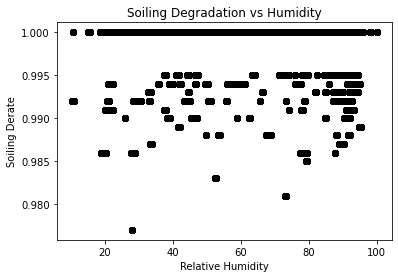

In [10]:
plt.scatter(df3["Relative humidity (%RH)"], df3["PV module soiling derate"], color="black") 
plt.xlabel("Relative Humidity"); plt.ylabel("Soiling Derate")
plt.title("Soiling Degradation vs Humidity")

Text(0.5, 1.0, 'Back Temperature Effect on Soiling Degradation')

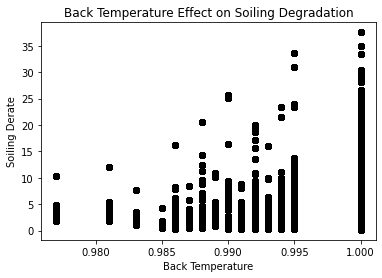

In [11]:
plt.scatter(df3["PV module soiling derate"], df3["Pmp (W)"], color="black") 
plt.xlabel("Back Temperature"); plt.ylabel("Soiling Derate")
plt.title("Back Temperature Effect on Soiling Degradation")

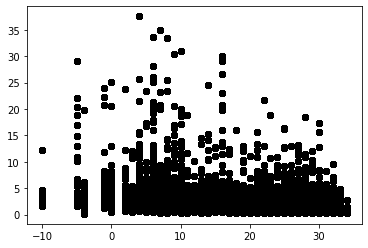

In [12]:
plt.scatter(df3["tempC"], df3["Pmp (W)"], color = "black")

count    11286.000000
mean      -901.523755
std       2980.774222
min      -9999.000000
25%         51.100000
50%         82.000000
75%         89.700000
max        100.000000
Name: Relative humidity (%RH), dtype: float64
count    74195.000000
mean        77.120445
std         20.649072
min         10.300000
25%         71.100000
50%         87.100000
75%         91.500000
max        100.000000
Name: Relative humidity (%RH), dtype: float64


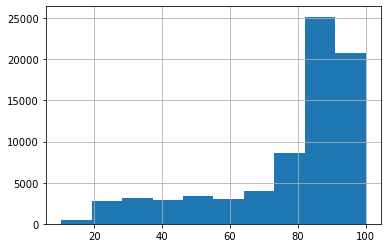

In [13]:
print(df["Relative humidity (%RH)"].describe())
print(df3["Relative humidity (%RH)"].describe())
df3["Relative humidity (%RH)"].hist()

count    11286.000000
mean        12.598627
std          7.848526
min        -18.900000
25%          7.100000
50%         13.000000
75%         18.500000
max         47.700000
Name: PV module back surface temperature (degC), dtype: float64
count    74195.000000
mean        14.252039
std          8.297424
min        -18.900000
25%          8.600000
50%         15.300000
75%         21.000000
max         28.200000
Name: PV module back surface temperature (degC), dtype: float64


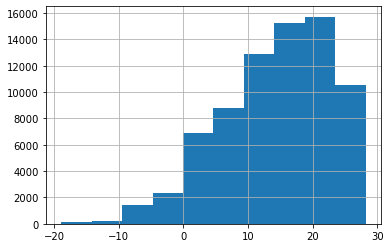

In [14]:
print(df["PV module back surface temperature (degC)"].describe())
print(df3["PV module back surface temperature (degC)"].describe())
df3["PV module back surface temperature (degC)"].hist()

count    11286.000000
mean         0.997620
std          0.004866
min          0.964000
25%          0.995000
50%          1.000000
75%          1.000000
max          1.000000
Name: PV module soiling derate, dtype: float64
count    74195.000000
mean         0.998422
std          0.003408
min          0.977000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: PV module soiling derate, dtype: float64


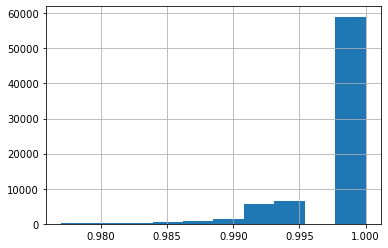

In [15]:
print(df["PV module soiling derate"].describe())
print(df3["PV module soiling derate"].describe())
df3["PV module soiling derate"].hist()

count    11286.000000
mean        44.487852
std         39.186134
min         20.000000
25%         22.800000
50%         27.200000
75%         57.600000
max       1100.600000
Name: POA irradiance CMP22 pyranometer (W/m2), dtype: float64
count    74195.000000
mean        39.719422
std         33.274040
min         20.000000
25%         22.500000
50%         25.500000
75%         51.500000
max        394.600000
Name: POA irradiance CMP22 pyranometer (W/m2), dtype: float64


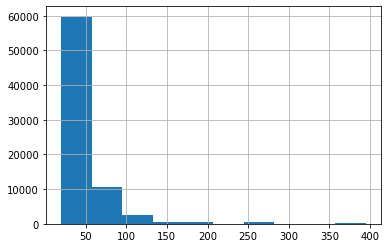

In [16]:
print(df["POA irradiance CMP22 pyranometer (W/m2)"].describe())
print(df3["POA irradiance CMP22 pyranometer (W/m2)"].describe())
df3["POA irradiance CMP22 pyranometer (W/m2)"].hist()

In [118]:
# create basic regression model
x_vars = ["humidity", "Direct normal irradiance (W/m2)", "PV module back surface temperature (degC)", 
          "tempC", "windspeedKmph", "POA irradiance CMP22 pyranometer (W/m2)", "sunHour", "cloudcover", 
          "precipMM", "winddirDegree", "Global horizontal irradiance (W/m2)", "Diffuse horizontal irradiance (W/m2)"]
y_var = ["Pmp (W)"]
simple_reg = sklearn.linear_model.LinearRegression(normalize=True)
simple_reg.fit(df3.loc[:, x_vars], df3.loc[:, y_var])

# predictions
pred = simple_reg.predict(df3.loc[:, x_vars])
print("mean squared error", sklearn.metrics.mean_squared_error(pred, df3.loc[:, y_var]))
print("coefficients", simple_reg.coef_)

mean squared error 6.811390391968487
coefficients [[ 2.18513081e-02 -3.72129029e-03 -2.85618274e-02  4.45091636e-02
   9.73715023e-03  7.84192650e-02 -1.84871137e-02  5.64591764e-04
  -1.33534104e-02  2.09120919e-05  9.19652821e-03  8.62982441e-03]]


In [119]:
# create basic regression model
simple_reg = sklearn.linear_model.LinearRegression(normalize=True)
simple_reg.fit(df3.loc[:, x_vars], df3.loc[:, y_var])

# predictions
pred = simple_reg.predict(df3.loc[:, x_vars])
print("mean squared error", sklearn.metrics.mean_squared_error(pred, df3.loc[:, y_var]))
print("R2 score", sklearn.metrics.r2_score(df3.loc[:, y_var], pred))
print("coefficients", simple_reg.coef_)

mean squared error 6.811390391968487
R2 score 0.5156776259049689
coefficients [[ 2.18513081e-02 -3.72129029e-03 -2.85618274e-02  4.45091636e-02
   9.73715023e-03  7.84192650e-02 -1.84871137e-02  5.64591764e-04
  -1.33534104e-02  2.09120919e-05  9.19652821e-03  8.62982441e-03]]


In [19]:
# create basic regression model
simple_reg = sklearn.linear_model.LinearRegression(normalize=True)
simple_reg.fit(df_cleaned.loc[:, x_vars], df_cleaned.loc[:, y_var])

# predictions
pred = simple_reg.predict(df_cleaned.loc[:, x_vars])
print("mean squared error", sklearn.metrics.mean_squared_error(pred, df_cleaned.loc[:, y_var]))
print("R2 score", sklearn.metrics.r2_score(pred, df_cleaned.loc[:, y_var]))
print("coefficients", simple_reg.coef_)


mean squared error 0.1321741136472501
R2 score 0.9666614418812665
coefficients [[-0.00199157  0.0141222  -0.02108934  0.00135076  0.04134961  0.03827433
   0.01802126]]
